In [1]:
from scipy import stats as s
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('food-consumption.csv')

In [3]:
df

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


In [4]:
df.shape

(16, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 21 columns):
Country           16 non-null object
Real coffee       16 non-null int64
Instant coffee    16 non-null int64
Tea               16 non-null int64
Sweetener         15 non-null float64
Biscuits          15 non-null float64
Powder soup       16 non-null int64
Tin soup          16 non-null int64
Potatoes          16 non-null int64
Frozen fish       16 non-null int64
Frozen veggies    16 non-null int64
Apples            16 non-null int64
Oranges           16 non-null int64
Tinned fruit      16 non-null int64
Jam               16 non-null int64
Garlic            16 non-null int64
Butter            16 non-null int64
Margarine         16 non-null int64
Olive oil         16 non-null int64
Yoghurt           15 non-null float64
Crisp bread       16 non-null int64
dtypes: float64(3), int64(17), object(1)
memory usage: 2.7+ KB


In [6]:
df.isnull().sum()

Country           0
Real coffee       0
Instant coffee    0
Tea               0
Sweetener         1
Biscuits          1
Powder soup       0
Tin soup          0
Potatoes          0
Frozen fish       0
Frozen veggies    0
Apples            0
Oranges           0
Tinned fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive oil         0
Yoghurt           1
Crisp bread       0
dtype: int64

In [7]:
df.describe()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
count,16.000000,16.000000,16.000000,15.000000,15.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,16.000000
mean,78.562500,39.250000,78.500000,18.000000,60.666667,49.000000,18.312500,12.750000,21.875000,15.87500,66.812500,70.500000,41.937500,55.187500,42.312500,75.812500,69.125000,54.187500,20.533333,27.750000
std,23.145824,23.147354,18.540047,10.902162,19.841035,15.427249,20.178268,9.574271,13.980343,12.78997,17.581122,14.033294,23.256451,22.592679,34.677022,20.910026,26.849891,28.842604,18.980692,25.026652
min,27.000000,10.000000,40.000000,2.000000,22.000000,27.000000,1.000000,2.000000,4.000000,2.00000,22.000000,42.000000,8.000000,16.000000,5.000000,31.000000,24.000000,13.000000,2.000000,3.000000
25%,71.500000,17.000000,62.500000,11.000000,56.000000,36.250000,3.750000,6.500000,13.750000,6.50000,56.750000,65.250000,28.000000,40.250000,11.000000,64.500000,47.750000,29.500000,5.500000,10.500000
50%,89.000000,39.000000,84.500000,19.000000,62.000000,47.000000,11.500000,10.000000,19.500000,13.00000,71.500000,72.000000,43.000000,54.000000,25.500000,83.000000,79.000000,52.500000,13.000000,21.000000
75%,96.000000,54.250000,92.250000,26.500000,75.000000,58.000000,20.000000,17.000000,26.250000,21.50000,81.000000,77.250000,50.750000,72.000000,81.500000,94.000000,94.000000,83.250000,30.500000,31.000000
max,98.000000,86.000000,99.000000,35.000000,91.000000,75.000000,76.000000,39.000000,54.000000,45.00000,87.000000,94.000000,89.000000,91.000000,91.000000,97.000000,97.000000,94.000000,57.000000,93.000000


In [8]:
df.loc[df['Sweetener'].isnull()]['Sweetener']

14   NaN
Name: Sweetener, dtype: float64

In [9]:
df.loc[df['Biscuits'].isnull()]['Biscuits']

10   NaN
Name: Biscuits, dtype: float64

In [10]:
df.loc[df['Yoghurt'].isnull()]['Yoghurt']

13   NaN
Name: Yoghurt, dtype: float64

In [11]:
df['Sweetener'].fillna(value=round(df['Sweetener'].mean(),2),inplace=True)
df

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


In [12]:
df['Biscuits'].fillna(value=round(df['Biscuits'].mean(),2),inplace=True)
df

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.00,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.00,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.00,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.00,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.00,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.00,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.00,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.00,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.00,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.00,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


In [13]:
df['Yoghurt'].fillna(value=round(df['Yoghurt'].mean(),2),inplace=True)
df

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.00,51,19,21,27,...,81,75,44,71,22,91,85,74,30.00,26
1,Italy,82,10,60,2.0,55.00,41,3,2,4,...,67,71,9,46,80,66,24,94,5.00,18
2,France,88,42,63,4.0,76.00,53,11,23,11,...,87,84,40,45,88,94,47,36,57.00,3
3,Holland,96,62,98,32.0,62.00,67,43,7,14,...,83,89,61,81,15,31,97,13,53.00,15
4,Belgium,94,38,48,11.0,74.00,37,23,9,13,...,76,76,42,57,29,84,80,83,20.00,5
5,Luxembourg,97,61,86,28.0,79.00,73,12,7,26,...,85,94,83,20,91,94,94,84,31.00,24
6,England,27,86,99,22.0,91.00,55,76,17,20,...,76,68,89,91,11,95,94,57,11.00,28
7,Portugal,72,26,77,2.0,22.00,34,1,5,20,...,22,51,8,16,89,65,78,92,6.00,9
8,Austria,55,31,61,15.0,29.00,33,1,5,15,...,49,42,14,41,51,51,72,28,13.00,11
9,Switzerland,73,72,85,25.0,31.00,69,10,17,19,...,79,70,46,61,64,82,48,61,48.00,30


In [14]:
df.isnull().sum()

Country           0
Real coffee       0
Instant coffee    0
Tea               0
Sweetener         0
Biscuits          0
Powder soup       0
Tin soup          0
Potatoes          0
Frozen fish       0
Frozen veggies    0
Apples            0
Oranges           0
Tinned fruit      0
Jam               0
Garlic            0
Butter            0
Margarine         0
Olive oil         0
Yoghurt           0
Crisp bread       0
dtype: int64

In [15]:
df.kurtosis()

Real coffee       1.019405
Instant coffee   -0.676180
Tea              -0.402586
Sweetener        -0.970910
Biscuits          0.131851
Powder soup      -1.041045
Tin soup          3.610954
Potatoes          2.555217
Frozen fish       1.506809
Frozen veggies    1.154756
Apples            1.195283
Oranges          -0.070173
Tinned fruit      0.104295
Jam              -0.738795
Garlic           -1.780691
Butter           -0.404829
Margarine        -1.248904
Olive oil        -1.621018
Yoghurt          -0.252454
Crisp bread       1.950650
dtype: float64

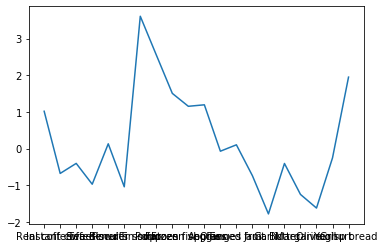

In [16]:
plt.plot(df.kurtosis())

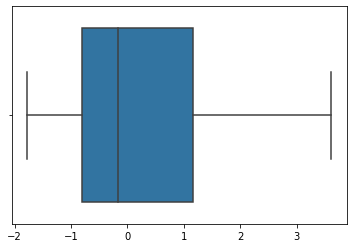

In [17]:
sns.boxplot(df.kurtosis())

In [18]:
df.skew()

Real coffee      -1.393637
Instant coffee    0.455324
Tea              -0.823639
Sweetener        -0.032865
Biscuits         -0.740399
Powder soup       0.411364
Tin soup          1.846718
Potatoes          1.388787
Frozen fish       1.260095
Frozen veggies    1.252863
Apples           -1.061611
Oranges          -0.458777
Tinned fruit      0.458299
Jam              -0.034342
Garlic            0.416234
Butter           -0.807415
Margarine        -0.611976
Olive oil         0.112726
Yoghurt           0.966839
Crisp bread       1.530070
dtype: float64

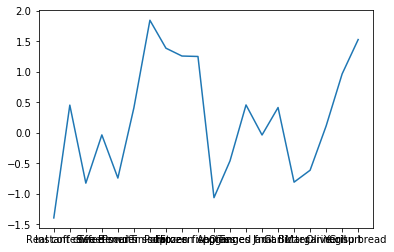

In [19]:
plt.plot(df.skew())

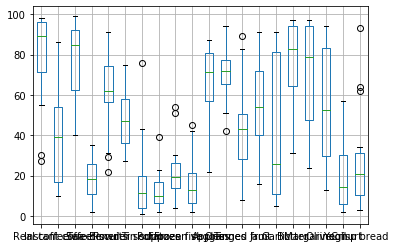

In [20]:
df.boxplot()

In [21]:
df.columns=[i.replace(' ','_') for i in df.columns]

In [22]:
df

,Country,Real_coffee,Instant_coffee,Tea,Sweetener,Biscuits,Powder_soup,Tin_soup,Potatoes,Frozen_fish,...,Apples,Oranges,Tinned_fruit,Jam,Garlic,Butter,Margarine,Olive_oil,Yoghurt,Crisp_bread
0,Germany,90,49,88,19.0,57.00,51,19,21,27,...,81,75,44,71,22,91,85,74,30.00,26
1,Italy,82,10,60,2.0,55.00,41,3,2,4,...,67,71,9,46,80,66,24,94,5.00,18
2,France,88,42,63,4.0,76.00,53,11,23,11,...,87,84,40,45,88,94,47,36,57.00,3
3,Holland,96,62,98,32.0,62.00,67,43,7,14,...,83,89,61,81,15,31,97,13,53.00,15
4,Belgium,94,38,48,11.0,74.00,37,23,9,13,...,76,76,42,57,29,84,80,83,20.00,5
5,Luxembourg,97,61,86,28.0,79.00,73,12,7,26,...,85,94,83,20,91,94,94,84,31.00,24
6,England,27,86,99,22.0,91.00,55,76,17,20,...,76,68,89,91,11,95,94,57,11.00,28
7,Portugal,72,26,77,2.0,22.00,34,1,5,20,...,22,51,8,16,89,65,78,92,6.00,9
8,Austria,55,31,61,15.0,29.00,33,1,5,15,...,49,42,14,41,51,51,72,28,13.00,11
9,Switzerland,73,72,85,25.0,31.00,69,10,17,19,...,79,70,46,61,64,82,48,61,48.00,30


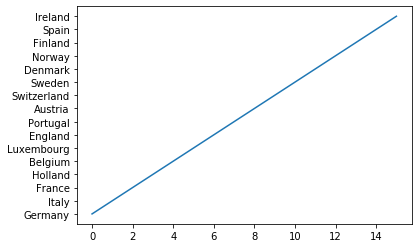

In [23]:
plt.plot(df.Country)

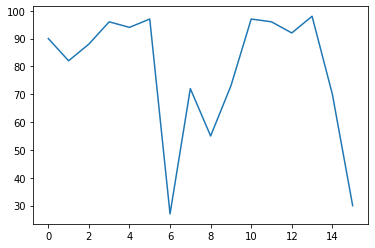

In [24]:
plt.plot(df.Real_coffee)

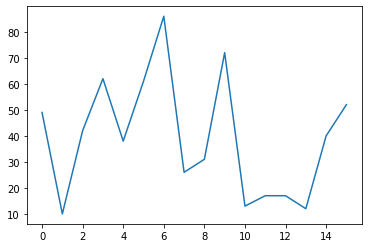

In [25]:
plt.plot(df.Instant_coffee)

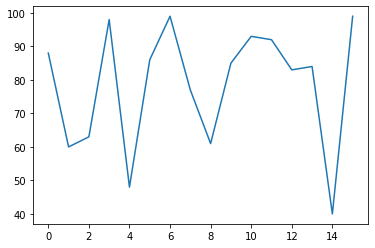

In [26]:
plt.plot(df.Tea)

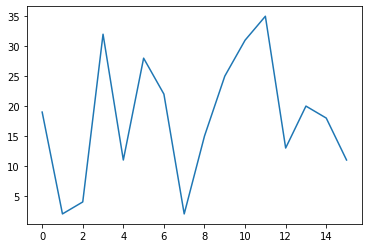

In [27]:
plt.plot(df.Sweetener)

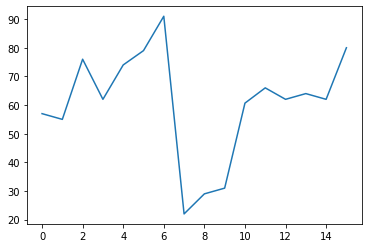

In [28]:
plt.plot(df.Biscuits)

In [29]:
df['sum']=df['Real_coffee']+df['Instant_coffee']+df['Tea']+df['Sweetener']+df['Biscuits']+df['Powder_soup']+df['Tin_soup']+df['Potatoes']+df['Frozen_fish']+df['Frozen_veggies']+df['Apples']+df['Oranges']+df['Tinned_fruit']+df['Jam']+df['Garlic']+df['Butter']+df['Margarine']+df['Olive_oil']+df['Yoghurt']+df['Crisp_bread']

In [30]:
df['per']=df['sum']/19

In [56]:
df

,Country,Real_coffee,Instant_coffee,Tea,Sweetener,Biscuits,Powder_soup,Tin_soup,Potatoes,Frozen_fish,...,Tinned_fruit,Jam,Garlic,Butter,Margarine,Olive_oil,Yoghurt,Crisp_bread,sum,per
0,Germany,90,49,88,19.0,57.00,51,19,21,27,...,44,71,22,91,85,74,30.00,26,1041.00,54.789474
1,Italy,82,10,60,2.0,55.00,41,3,2,4,...,9,46,80,66,24,94,5.00,18,741.00,39.000000
2,France,88,42,63,4.0,76.00,53,11,23,11,...,40,45,88,94,47,36,57.00,3,957.00,50.368421
3,Holland,96,62,98,32.0,62.00,67,43,7,14,...,61,81,15,31,97,13,53.00,15,1033.00,54.368421
4,Belgium,94,38,48,11.0,74.00,37,23,9,13,...,42,57,29,84,80,83,20.00,5,911.00,47.947368
5,Luxembourg,97,61,86,28.0,79.00,73,12,7,26,...,83,20,91,94,94,84,31.00,24,1192.00,62.736842
6,England,27,86,99,22.0,91.00,55,76,17,20,...,89,91,11,95,94,57,11.00,28,1137.00,59.842105
7,Portugal,72,26,77,2.0,22.00,34,1,5,20,...,8,16,89,65,78,92,6.00,9,698.00,36.736842
8,Austria,55,31,61,15.0,29.00,33,1,5,15,...,14,41,51,51,72,28,13.00,11,628.00,33.052632
9,Switzerland,73,72,85,25.0,31.00,69,10,17,19,...,46,61,64,82,48,61,48.00,30,1005.00,52.894737


In [32]:
df.to_csv('food-consumption1.csv')

In [33]:
df1=pd.read_csv('food-consumption1.csv')

In [34]:
df1

,Unnamed: 0,Country,Real_coffee,Instant_coffee,Tea,Sweetener,Biscuits,Powder_soup,Tin_soup,Potatoes,...,Tinned_fruit,Jam,Garlic,Butter,Margarine,Olive_oil,Yoghurt,Crisp_bread,sum,per
0,0,Germany,90,49,88,19.0,57.00,51,19,21,...,44,71,22,91,85,74,30.00,26,1041.00,54.789474
1,1,Italy,82,10,60,2.0,55.00,41,3,2,...,9,46,80,66,24,94,5.00,18,741.00,39.000000
2,2,France,88,42,63,4.0,76.00,53,11,23,...,40,45,88,94,47,36,57.00,3,957.00,50.368421
3,3,Holland,96,62,98,32.0,62.00,67,43,7,...,61,81,15,31,97,13,53.00,15,1033.00,54.368421
4,4,Belgium,94,38,48,11.0,74.00,37,23,9,...,42,57,29,84,80,83,20.00,5,911.00,47.947368
5,5,Luxembourg,97,61,86,28.0,79.00,73,12,7,...,83,20,91,94,94,84,31.00,24,1192.00,62.736842
6,6,England,27,86,99,22.0,91.00,55,76,17,...,89,91,11,95,94,57,11.00,28,1137.00,59.842105
7,7,Portugal,72,26,77,2.0,22.00,34,1,5,...,8,16,89,65,78,92,6.00,9,698.00,36.736842
8,8,Austria,55,31,61,15.0,29.00,33,1,5,...,14,41,51,51,72,28,13.00,11,628.00,33.052632
9,9,Switzerland,73,72,85,25.0,31.00,69,10,17,...,46,61,64,82,48,61,48.00,30,1005.00,52.894737


In [35]:
for i in df.columns:
    print(i)
    print(df[1:].mean())
    
    
    
    

Country
Real_coffee        77.800000
Instant_coffee     38.600000
Tea                77.866667
Sweetener          17.933333
Biscuits           60.911333
Powder_soup        48.866667
Tin_soup           18.266667
Potatoes           12.200000
Frozen_fish        21.533333
Frozen_veggies     15.533333
Apples             65.866667
Oranges            70.200000
Tinned_fruit       41.800000
Jam                54.133333
Garlic             43.666667
Butter             74.800000
Margarine          68.066667
Olive_oil          52.866667
Yoghurt            19.902000
Crisp_bread        27.866667
sum               908.680000
per                47.825263
dtype: float64
Real_coffee
Real_coffee        77.800000
Instant_coffee     38.600000
Tea                77.866667
Sweetener          17.933333
Biscuits           60.911333
Powder_soup        48.866667
Tin_soup           18.266667
Potatoes           12.200000
Frozen_fish        21.533333
Frozen_veggies     15.533333
Apples             65.866667
Oranges 

dtype: float64
per
Real_coffee        77.800000
Instant_coffee     38.600000
Tea                77.866667
Sweetener          17.933333
Biscuits           60.911333
Powder_soup        48.866667
Tin_soup           18.266667
Potatoes           12.200000
Frozen_fish        21.533333
Frozen_veggies     15.533333
Apples             65.866667
Oranges            70.200000
Tinned_fruit       41.800000
Jam                54.133333
Garlic             43.666667
Butter             74.800000
Margarine          68.066667
Olive_oil          52.866667
Yoghurt            19.902000
Crisp_bread        27.866667
sum               908.680000
per                47.825263
dtype: float64


In [63]:
df.drop_duplicates('Instant_coffee',inplace=True)
df

,Country,Real_coffee,Instant_coffee,Tea,Sweetener,Biscuits,Powder_soup,Tin_soup,Potatoes,Frozen_fish,...,Tinned_fruit,Jam,Garlic,Butter,Margarine,Olive_oil,Yoghurt,Crisp_bread,sum,per
0,Germany,90,49,88,19.0,57.00,51,19,21,27,...,44,71,22,91,85,74,30.00,26,1041.00,54.789474
1,Italy,82,10,60,2.0,55.00,41,3,2,4,...,9,46,80,66,24,94,5.00,18,741.00,39.000000
2,France,88,42,63,4.0,76.00,53,11,23,11,...,40,45,88,94,47,36,57.00,3,957.00,50.368421
3,Holland,96,62,98,32.0,62.00,67,43,7,14,...,61,81,15,31,97,13,53.00,15,1033.00,54.368421
4,Belgium,94,38,48,11.0,74.00,37,23,9,13,...,42,57,29,84,80,83,20.00,5,911.00,47.947368
5,Luxembourg,97,61,86,28.0,79.00,73,12,7,26,...,83,20,91,94,94,84,31.00,24,1192.00,62.736842
6,England,27,86,99,22.0,91.00,55,76,17,20,...,89,91,11,95,94,57,11.00,28,1137.00,59.842105
7,Portugal,72,26,77,2.0,22.00,34,1,5,20,...,8,16,89,65,78,92,6.00,9,698.00,36.736842
8,Austria,55,31,61,15.0,29.00,33,1,5,15,...,14,41,51,51,72,28,13.00,11,628.00,33.052632
9,Switzerland,73,72,85,25.0,31.00,69,10,17,19,...,46,61,64,82,48,61,48.00,30,1005.00,52.894737


In [116]:
df.sort_values('Instant_coffee',inplace=True)
df

,Country,Real_coffee,Instant_coffee,Tea,Sweetener,Biscuits,Powder_soup,Tin_soup,Potatoes,Frozen_fish,...,Tinned_fruit,Jam,Garlic,Butter,Margarine,Olive_oil,Yoghurt,Crisp_bread,sum,per
1,Italy,82,10,60,2.0,55.00,41,3,2,4,...,9,46,80,66,24,94,5.00,18,741.00,39.000000
13,Finland,98,12,84,20.0,64.00,27,10,8,18,...,22,37,15,96,94,17,20.53,64,825.53,43.448947
10,Sweden,97,13,93,31.0,60.67,43,43,39,54,...,53,75,9,68,32,48,2.00,93,1032.67,54.351053
11,Denmark,96,17,92,35.0,66.00,32,17,11,51,...,50,64,11,92,91,30,11.00,34,995.00,52.368421
7,Portugal,72,26,77,2.0,22.00,34,1,5,20,...,8,16,89,65,78,92,6.00,9,698.00,36.736842
8,Austria,55,31,61,15.0,29.00,33,1,5,15,...,14,41,51,51,72,28,13.00,11,628.00,33.052632
4,Belgium,94,38,48,11.0,74.00,37,23,9,13,...,42,57,29,84,80,83,20.00,5,911.00,47.947368
14,Spain,70,40,40,18.0,62.00,43,2,14,23,...,30,38,86,44,51,91,16.00,13,824.00,43.368421
2,France,88,42,63,4.0,76.00,53,11,23,11,...,40,45,88,94,47,36,57.00,3,957.00,50.368421
0,Germany,90,49,88,19.0,57.00,51,19,21,27,...,44,71,22,91,85,74,30.00,26,1041.00,54.789474


In [123]:
df.Instant_coffee.sort_index()



0     49
1     10
2     42
3     62
4     38
5     61
6     86
7     26
8     31
9     72
10    13
11    17
13    12
14    40
15    52
Name: Instant_coffee, dtype: int64

In [125]:
df

,Country,Real_coffee,Instant_coffee,Tea,Sweetener,Biscuits,Powder_soup,Tin_soup,Potatoes,Frozen_fish,...,Tinned_fruit,Jam,Garlic,Butter,Margarine,Olive_oil,Yoghurt,Crisp_bread,sum,per
1,Italy,82,10,60,2.0,55.00,41,3,2,4,...,9,46,80,66,24,94,5.00,18,741.00,39.000000
13,Finland,98,12,84,20.0,64.00,27,10,8,18,...,22,37,15,96,94,17,20.53,64,825.53,43.448947
10,Sweden,97,13,93,31.0,60.67,43,43,39,54,...,53,75,9,68,32,48,2.00,93,1032.67,54.351053
11,Denmark,96,17,92,35.0,66.00,32,17,11,51,...,50,64,11,92,91,30,11.00,34,995.00,52.368421
7,Portugal,72,26,77,2.0,22.00,34,1,5,20,...,8,16,89,65,78,92,6.00,9,698.00,36.736842
8,Austria,55,31,61,15.0,29.00,33,1,5,15,...,14,41,51,51,72,28,13.00,11,628.00,33.052632
4,Belgium,94,38,48,11.0,74.00,37,23,9,13,...,42,57,29,84,80,83,20.00,5,911.00,47.947368
14,Spain,70,40,40,18.0,62.00,43,2,14,23,...,30,38,86,44,51,91,16.00,13,824.00,43.368421
2,France,88,42,63,4.0,76.00,53,11,23,11,...,40,45,88,94,47,36,57.00,3,957.00,50.368421
0,Germany,90,49,88,19.0,57.00,51,19,21,27,...,44,71,22,91,85,74,30.00,26,1041.00,54.789474


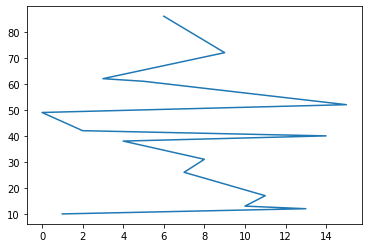

In [124]:
plt.plot(df.Instant_coffee,)

In [126]:
df.Instant_coffee.describe()

count    15.000000
mean     40.733333
std      23.159283
min      10.000000
25%      21.500000
50%      40.000000
75%      56.500000
max      86.000000
Name: Instant_coffee, dtype: float64